


> **Lab 2 - ** **Fourier Transform**




Question 1- import functions for calculating discrete fourier transform and its inverse from SciPy.fft library (fft, ifft, fftshift)



In [ ]:
from scipy.fft import fft, ifft, fftshift


Question 2- Calculate the discrete fourier transform of the following vector x = [1,2,1,-1,1.5]

In [ ]:

x = [1, 2, 1, -1, 1.5]
dft_result = fft(x)
print(dft_result)

[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]


Question 3- Check with the inverse fourier transform to retrieve the initial vector

In [ ]:
x = [1, 2, 1, -1, 1.5]
dft_result = fft(x)
retrieved_x = ifft(dft_result)
print(retrieved_x)

[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]


Question 4- Create a signal whose values are all 0 except one which will be worth 1.

In [ ]:
signal = [0, 1, 0, 0, 0]

[0, 1, 0, 0, 0]


Question 5- Plot this signal using matplotlib.pyplot library

<ipython-input-9-c3d47038a71b>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(time_values, signal, use_line_collection=True)


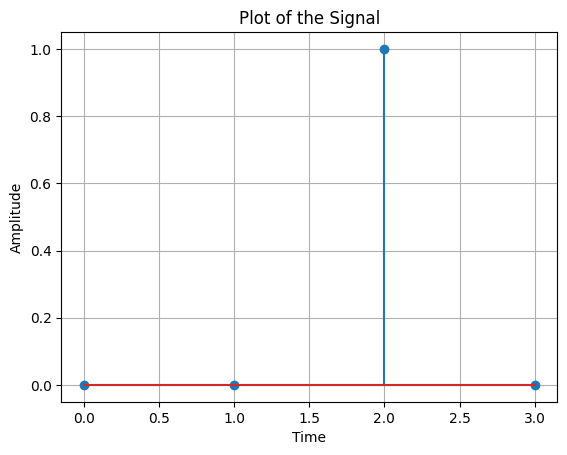

In [ ]:
import matplotlib.pyplot as plt
signal = [0,0, 1,0]
time_values = range(len(signal))
plt.stem(time_values, signal, use_line_collection=True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Plot of the Signal')
plt.grid(True)
plt.show()

Question 6- Calculate the Fourier transform of this vector and visualize the result by plotting the real and imaginary parts separately

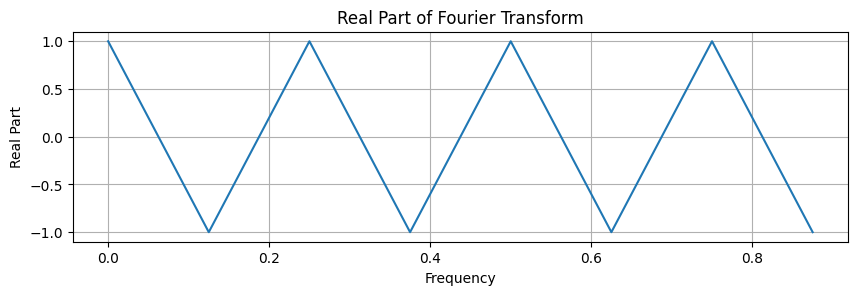

In [ ]:
fft_result = fft(signal)
real_part = [x.real for x in fft_result]
imaginary_part = [x.imag for x in fft_result]
N = len(signal)
frequency_axis = [(i / N) for i in range(N)]
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frequency_axis, real_part)
plt.xlabel('Frequency')
plt.ylabel('Real Part')
plt.title('Real Part of Fourier Transform')
plt.grid(True)


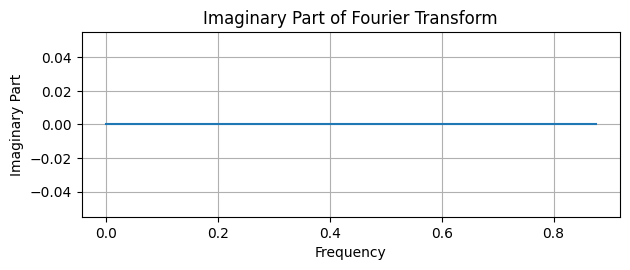

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(frequency_axis, imaginary_part)
plt.xlabel('Frequency')
plt.ylabel('Imaginary Part')
plt.title('Imaginary Part of Fourier Transform')
plt.grid(True)

plt.tight_layout()
plt.show()


Question 7- Consider a cosine signal defined on n = 100 points with 5 period then plot the resulting signal

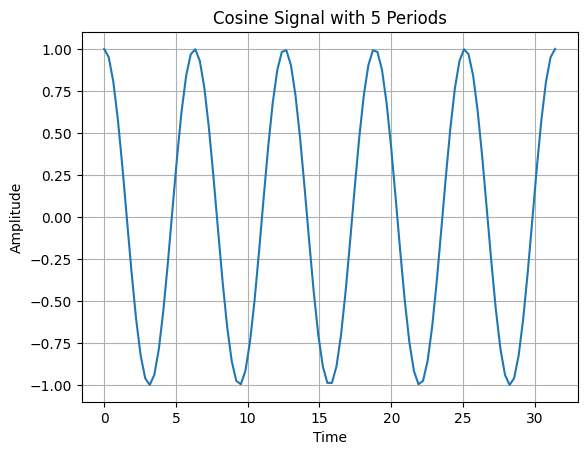

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n_points = 100
periods = 5
t = np.linspace(0, 2 * np.pi * periods, n_points)
cosine_signal = np.cos(t)
plt.plot(t, cosine_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Cosine Signal with 5 Periods')
plt.grid(True)
plt.show()


Question 8- Calculate the Fourier transform of the cosine signal using fft function then plot the result by illustrating the module and the phase separately. The module and the angle can be calculated using the abs and angle functions of numpy library, repectively.

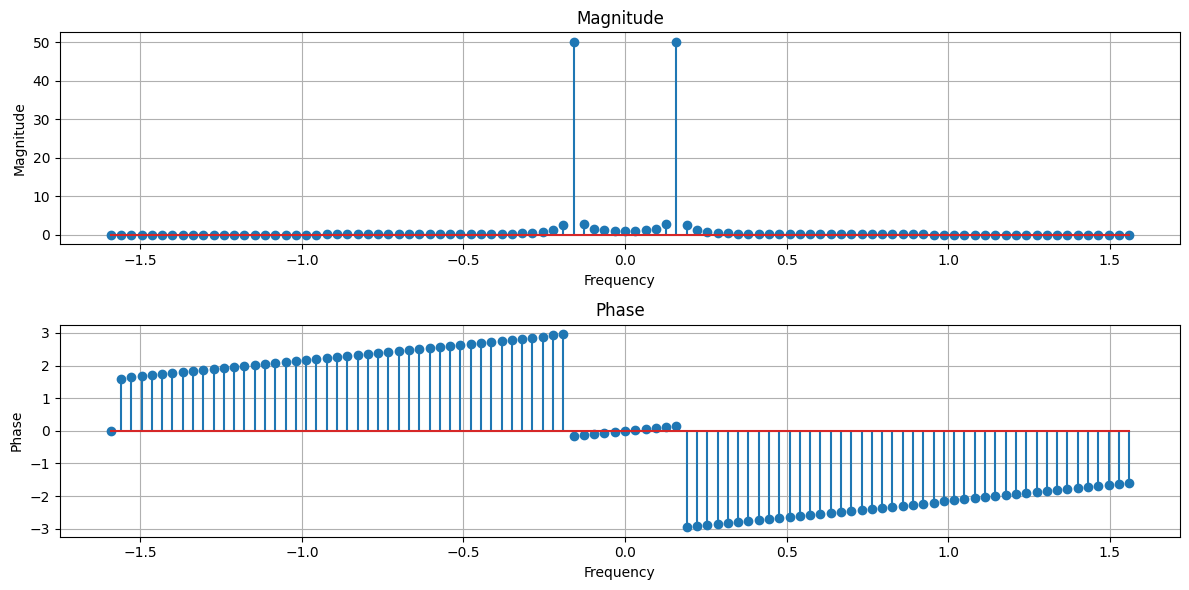

In [ ]:
cosine_fft = fft(cosine_signal)

magnitude = np.abs(cosine_fft)
phase = np.angle(cosine_fft)

sample_rate = n_points / (periods * 2 * np.pi)
frequencies = np.fft.fftfreq(n_points, 1 / sample_rate)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(frequencies, magnitude)
plt.title('Magnitude')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(frequencies, phase)
plt.title('Phase')
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.grid(True)

plt.tight_layout()
plt.show()

Question 9- interpret the result by comparing the module display to the analytical result of the Fourier transform on the cosine signal

The Fourier transform of a sinusoidal signal of frequency 𝑓0
  gives two Dirac peaks at −𝑓0
  and 𝑓0
. We clearly notice these two peaks in the previous result (module part).

Question 10- The Fourier transform of a sampled signal, as is the case with the data vector supplied to the fft function, is periodized around all integer multiples of the sampling frequency 𝐹𝑒
.

The calculation algorithm used by the fft function then provides results in the frequency interval [0,𝐹𝑒[
. However, in physics, we are more used to visualizing frequency responses centered around zero frequency. For this, there is a fftshift function which allows you to shift the right part of the vector to the left side (periodization) and thus obtain the usual display.
Edit the code to illustrate the Fourier Transform of the cosine signal

<ipython-input-52-0cb652da6da7>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read('0477.wav')  # Replace with the correct file path if needed


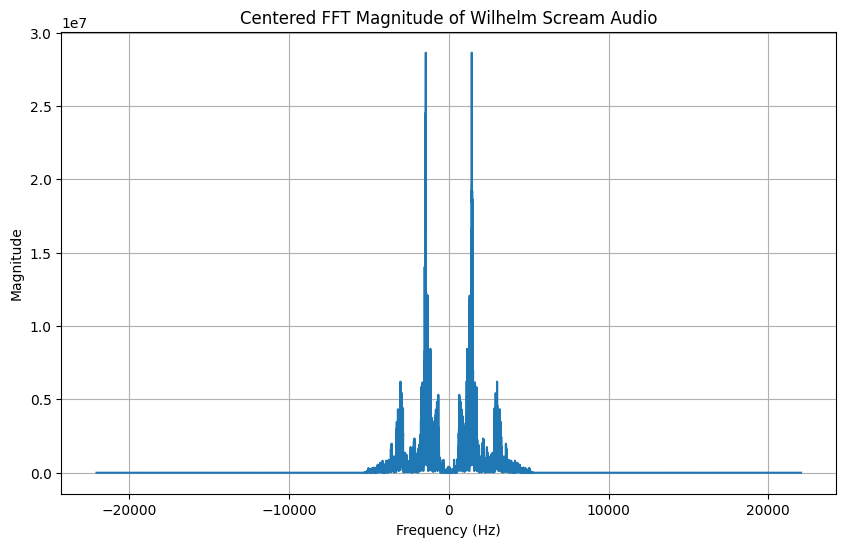

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftshift
sample_rate, audio_data = wavfile.read('0477.wav')
if len(audio_data.shape) == 2:
    audio_data = audio_data[:, 0]
fft_result = fft(audio_data)
fft_result_shifted = fftshift(fft_result)
magnitude = np.abs(fft_result_shifted)
N = len(audio_data)
frequency_axis = np.fft.fftfreq(N, 1 / sample_rate)
frequency_axis_shifted = np.fft.fftshift(frequency_axis)
plt.figure(figsize=(10, 6))
plt.plot(frequency_axis_shifted, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Centered FFT Magnitude of Wilhelm Scream Audio')
plt.grid(True)
plt.show()


Question 11- We will take an audio file 'Wilhelm scream' in wav format (https://lasonotheque.org/detail-0477-cri-wilhelm.html) and we will produce the FFT of this signal.

In [ ]:
from scipy.io import wavfile
sample_rate, audio_data = wavfile.read('0477.wav')

<ipython-input-38-e7bf8efffcab>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read('2002.wav')


Question 12- plot the resulting signal, you can use the following code to read the data andsample it
# Reading the file
rate, data = wavfile.read('0477.wav')
# Selection of canal 1
x = data[:, 0]  
# Creation of sampling steps
t = np.linspace(0, data.shape[0]/rate, data.shape[0])

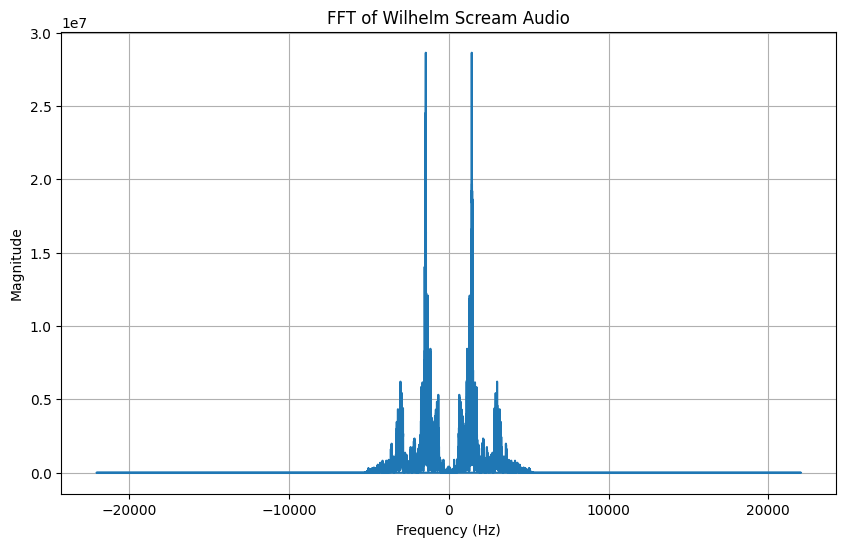

In [ ]:

if len(audio_data.shape) == 2:
    audio_data = audio_data[:, 0]
fft_result = np.fft.fft(audio_data)
magnitude = np.abs(fft_result)
N = len(audio_data)
frequency_axis = np.fft.fftfreq(N, 1 / sample_rate)
plt.figure(figsize=(10, 6))
plt.plot(frequency_axis, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Wilhelm Scream Audio')
plt.grid(True)
plt.show()

Question 13- Calculate the Fourier transform of the scream signal then plot its magnetude in the range [0,6000]

<ipython-input-46-28788741f792>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read('0477.wav')  # Replace with the correct file path if needed


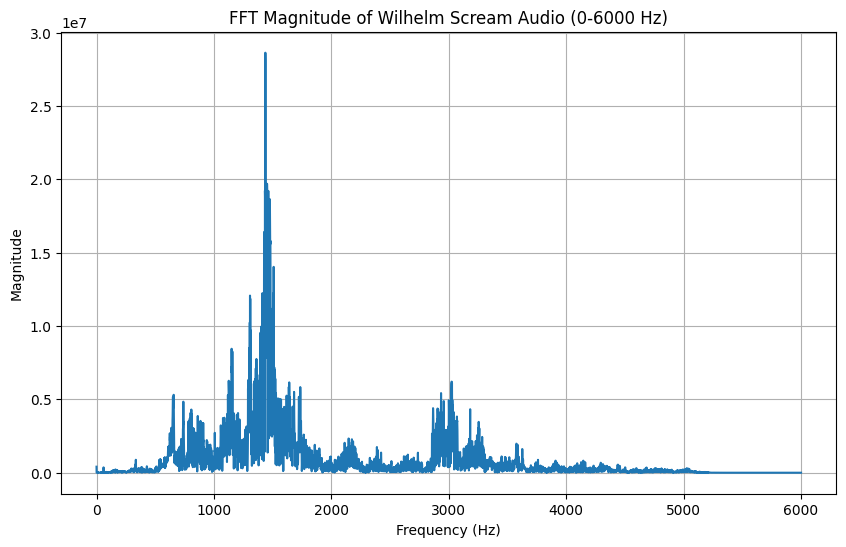

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft

# Load the WAV file
sample_rate, audio_data = wavfile.read('0477.wav')  # Replace with the correct file path if needed
if len(audio_data.shape) == 2:
    audio_data = audio_data[:, 0]
fft_result = np.fft.fft(audio_data)
magnitude = np.abs(fft_result)
N = len(audio_data)
frequency_axis = np.fft.fftfreq(N, 1 / sample_rate)
start_freq = 0  # Hz
end_freq = 6000  # Hz
indices = np.where((frequency_axis >= start_freq) & (frequency_axis <= end_freq))
selected_magnitude = magnitude[indices]
selected_frequency_axis = frequency_axis[indices]
plt.figure(figsize=(10, 6))
plt.plot(selected_frequency_axis, selected_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Magnitude of Wilhelm Scream Audio (0-6000 Hz)')
plt.grid(True)
plt.show()


Question 14- A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams. Calculate then plot the spectrogram of Whilhelm scream (notice you can use spectrogram function of scipy.signal library).

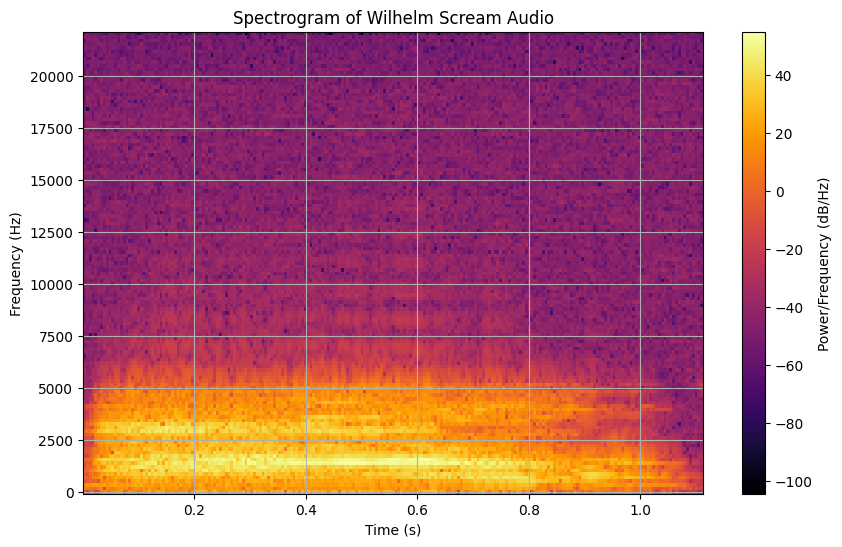

In [ ]:
from scipy.signal import spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate)
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='inferno')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Wilhelm Scream Audio')
plt.grid(True)
plt.show()
